### Author: Bismillah Jan
Mar 18, 2017
* Using Wisconsin breast cancer dataset
* Cross Validation practice 
* Using svm as classifier
* Train_Test split procedure


In [14]:
import pandas as pd
import scipy

In [87]:
fil='breast-cancer-wisconsin.data'
data=pd.read_csv(fil, index_col=0)
data=scipy.array(data)
print data[0]
 # separate data and labels
X=data[:,0:data.shape[1]-1]
y=data[:,-1]
print X[0], y[0]

[ 5  4  4  5  7 10  3  2  1  2]
[ 5  4  4  5  7 10  3  2  1] 2


In [88]:
from sklearn import svm #import svm 
from sklearn.cross_validation import train_test_split
from sklearn import metrics

## Only one train_test split

In [104]:
#instantiate classifier
myClassifier=svm.SVC(C=1.0, decision_function_shape='ovo', degree=2, kernel='rbf')

#split data into train and test (60:40 ratio)
xtrain,xtest,ytrain,ytest=train_test_split(X,y, test_size=0.4) 
#we can add random_state=4 <any number> to preserve the train & test data

#fit the model
myClassifier.fit(xtrain,ytrain)

#now test the model on test data
ypred=myClassifier.predict(xtest)

#Accuracy measure
acc=metrics.accuracy_score(ytest,ypred)
print acc

0.952380952381


## Using  5-folds cross validation

In [106]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score #for stratification purpose

#instantiate classifier
myClassifier=svm.SVC(C=1.0, decision_function_shape='ovo', degree=2, kernel='rbf')

#using Accuracy matrix
score=cross_val_score(myClassifier, X, y, cv=5, scoring='accuracy')


print score
print score.mean()

[ 0.89781022  0.91240876  0.96350365  0.98529412  0.98518519]
0.948840386114


## Searching for best value of C
* By running cross validation for multiple times

[0.9488403861138941, 0.95319832069080679, 0.95319832069080679, 0.95319832069080679, 0.95319832069080679]
[1.0, 10.0, 100.0, 1000.0, 10000.0]


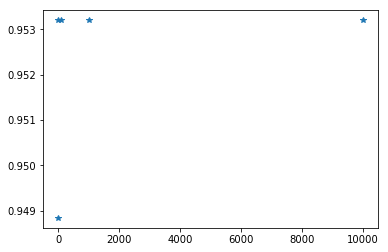

In [133]:
cList=[]
scoreList=[]
for i in range (5):
    cList.append(10.0**i)
    myClassifier=svm.SVC(C=10**i, decision_function_shape='linear', degree=2, kernel='rbf')
    score=cross_val_score(myClassifier, X, y, cv=5, scoring='accuracy')
    scoreList.append(score.mean())
print scoreList
print cList
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(cList, scoreList, '*')

# Logistic regression on iris dataset

In [149]:
from sklearn import datasets
iris=datasets.load_iris()
X=iris.data
y=iris.target

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
score=cross_val_score(lg, X,y, cv=5, scoring='accuracy')
print "Accuracy: ", score.mean()



Accuracy:  0.96
